Модель RandomForestClassifier, на основе данных BaseLine

In [1]:
import pandas as pd
import missingno as msn
import warnings
from fancyimpute import KNN
warnings.filterwarnings("ignore")

Загрузка и заполнение данных train

In [ ]:
df = pd.read_csv("../processed_train.csv")
df = df.drop(columns=['report_date', 'col2295', 'col2543', 'col2575'])
df = df.loc[:, ((df.isnull())).mean() < 0.8]
df_target_0 = df[df['target'] == 0]
df_target_1 = df[df['target'] == 1]
df_filled_0 = pd.DataFrame(KNN(k=6).fit_transform(df_target_0), columns=df_target_0.columns)
df_filled_1 = pd.DataFrame(KNN(k=6).fit_transform(df_target_1), columns=df_target_1.columns)
train = pd.concat([df_filled_0, df_filled_1])
columns_to_keep = train.columns

Загрузка и заполнение данных valid

In [ ]:
df = pd.read_csv("../valid/processed_valid.csv")
df = df.drop(columns='report_date')
df = df.loc[:, ((df.isnull())).mean() < 0.8]
df_target_0 = df[df['target'] == 0]
df_target_1 = df[df['target'] == 1]
df_filled_0 = pd.DataFrame(KNN(k=6).fit_transform(df_target_0), columns=df_target_0.columns)
df_filled_1 = pd.DataFrame(KNN(k=6).fit_transform(df_target_1), columns=df_target_1.columns)
valid = pd.concat([df_filled_0, df_filled_1])
valid = valid[columns_to_keep]

Обучение модели и метрика ROC-AUC

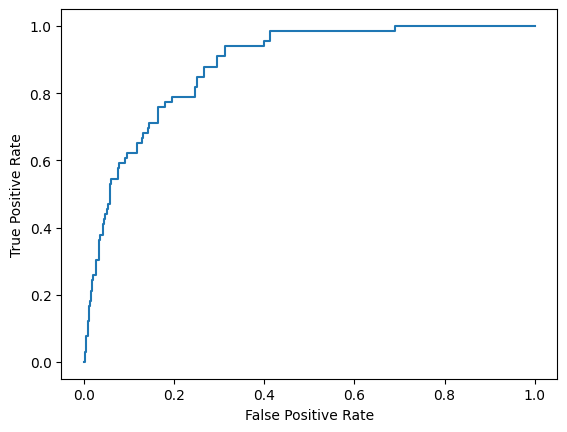

AUC: 0.883


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Загрузка Train
X_train = train.drop(columns='target')
y_train = train['target']
X_test = valid.drop(columns='target')
y_test = valid['target']

# инициализация и обучение модели
rf_classifier = RandomForestClassifier(min_samples_leaf=5, n_estimators=100, random_state=384)
rf_classifier.fit(X_train, y_train)

# предсказание вероятностей
y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)

Сохранение модели

In [5]:
import joblib
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']